In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
school = pd.read_csv('2016 School Explorer.csv', encoding='ISO-8859-1')

In [3]:
school.head(5)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [4]:
shsatreg = pd.read_csv('D5 SHSAT Registrations and Testers.csv', encoding='ISO-8859-1')
shsatreg.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14


### Student Grade who appeared for SHSAT 

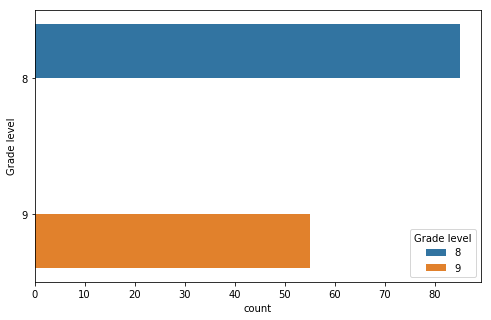

In [227]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.countplot(y='Grade level', data=shsatreg, hue='Grade level')

### Percentage of student registered and Student who actually took exams for each year

In [235]:
shsatstats = shsatreg.copy()
shsatstats['%StudentWhotookShsat'] = (shsatstats['Number of students who took the SHSAT']/shsatstats['Enrollment on 10/31'])*100
shsatstats['%StudentWhoregistered'] = (shsatstats['Number of students who registered for the SHSAT']/shsatstats['Enrollment on 10/31'])*100


In [243]:
meanshsatstatsforstudentwhotooktest = shsatstats.groupby(['Year of SHST', 'Grade level'], as_index=False)['%StudentWhotookShsat'].mean()
meanshsatstatsforstudentwhoregistered = shsatstats.groupby(['Year of SHST', 'Grade level'], as_index=False)['%StudentWhoregistered'].mean()

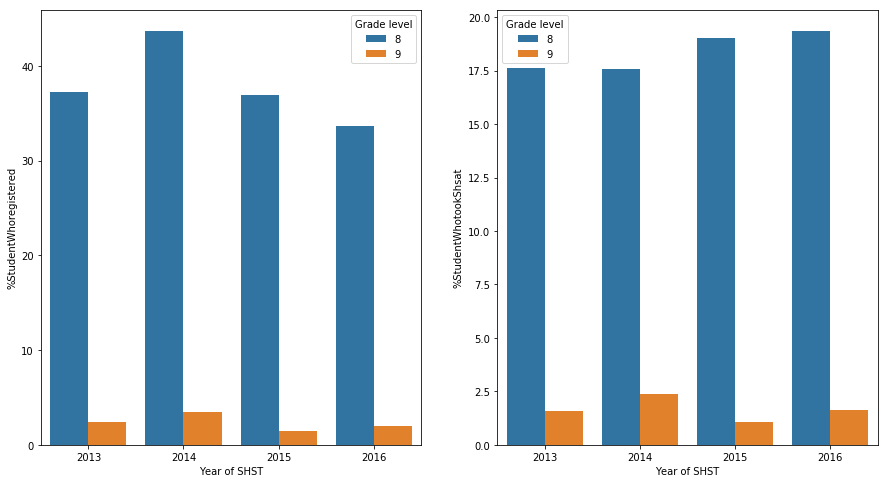

In [248]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))
f.suptitle = "SHSAT Stats for schools who registered. Year [2013 - 2016]"
sns.barplot(x='Year of SHST', y='%StudentWhoregistered', hue='Grade level', data=meanshsatstatsforstudentwhoregistered, ax=ax[0]);
sns.barplot(x='Year of SHST', y='%StudentWhotookShsat', hue='Grade level', data=meanshsatstatsforstudentwhotooktest, ax=ax[1]);

#### Based upon the chart above, it looks like Grade 8 and 9 are eligible to appear. 

In [282]:
#schoolswhichregistered = school.merge(shsatreg, left_on=['School Name'], right_on=['School name'], how='left')
print(list(school.columns))
print(list(shsatreg.columns))

['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name', 'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude', 'Address (Full)', 'City', 'Zip', 'Grades', 'Grade Low', 'Grade High', 'Community School?', 'Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Rigorous Instruction Rating', 'Collaborative Teachers %', 'Collaborative Teachers Rating', 'Supportive Environment %', 'Supportive Environment Rating', 'Effective School Leadership %', 'Effective School Leadership Rating', 'Strong Family-Community Ties %', 'Strong Family-Community Ties Rating', 'Trust %', 'Trust Rating', 'Student Achievement Rating', 'Average ELA Proficiency', 'Average Math Proficiency', 'Grade 3 ELA - All Students Tested', 'Grade 3 ELA 4s - All Students', 'Grade 3 ELA 4s - American India

In [7]:
schoolswhichregistered.columns.tolist()

['Adjusted Grade',
 'New?',
 'Other Location Code in LCGMS',
 'School Name',
 'SED Code',
 'Location Code',
 'District',
 'Latitude',
 'Longitude',
 'Address (Full)',
 'City',
 'Zip',
 'Grades',
 'Grade Low',
 'Grade High',
 'Community School?',
 'Economic Need Index',
 'School Income Estimate',
 'Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'Grade 3 ELA - All Students Tested',
 'Grade 3 ELA 4s - All S

### Lets look at ethinicity distribution and there subject proficiency (Math and English)

In [74]:
columns=['School Name', 'District', 
         'Percent Asian', 'Percent Black', 'Percent Hispanic', 
         'Percent Black / Hispanic', 'Percent White', 'Average ELA Proficiency', 
         'Average Math Proficiency']
ethinicdistribution = schoolswhichregistered[columns].copy()

In [75]:
ethinicdistribution['Percent Asian'] = pd.to_numeric(ethinicdistribution['Percent Asian'].apply(lambda x: x.replace('%', '')), errors='ignore')
ethinicdistribution['Percent Black'] = pd.to_numeric(ethinicdistribution['Percent Black'].apply(lambda x: x.replace('%', '')), errors='ignore')
ethinicdistribution['Percent White'] = pd.to_numeric(ethinicdistribution['Percent White'].apply(lambda x: x.replace('%', '')), errors='ignore')
ethinicdistribution['Percent Black / Hispanic'] = pd.to_numeric(ethinicdistribution['Percent Black / Hispanic'].apply(lambda x: x.replace('%', '')), errors='ignore')
ethinicdistribution['Percent Hispanic'] = pd.to_numeric(ethinicdistribution['Percent Hispanic'].apply(lambda x: x.replace('%', '')), errors='ignore')

### Check if ethinicity plays any role. 

In [76]:
schoolwithhighestavgproficiency = ethinicdistribution[(ethinicdistribution['Average ELA Proficiency'] > 3.0) & (ethinicdistribution['Average Math Proficiency'] > 3.0)]
schoolwithhighestavgproficiency = schoolwithhighestavgproficiency.sort_values(by=['Average ELA Proficiency', 'Average Math Proficiency'], ascending=[False, False])

#### How does Asian fare in term of grades

In [253]:
dfAsianAvgSubProficiency = schoolwithhighestavgproficiency.groupby('Percent Asian', as_index=False)['Average ELA Proficiency'].mean()
dfAsianAvgSubProficiency['Average Math Proficiency'] = schoolwithhighestavgproficiency.groupby('Percent Asian', as_index=False)['Average Math Proficiency'].mean()['Average Math Proficiency']
dfAsianAvgSubProficiency.head()

,Percent Asian,Average ELA Proficiency,Average Math Proficiency
0,1,3.184545,3.746364
1,2,3.050000,3.100000
2,3,3.180000,3.360000
3,4,3.120000,3.285000
4,5,3.296667,3.366667


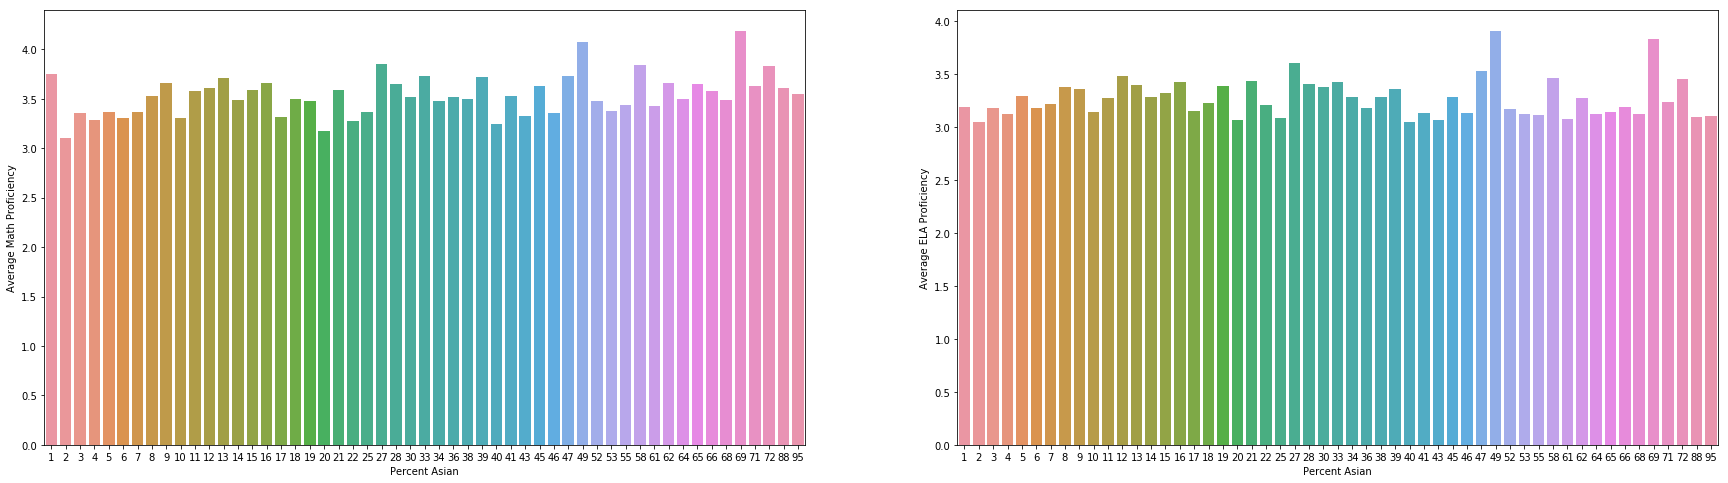

In [269]:
f, ax = plt.subplots(1, 2, figsize=(30, 8), sharex=True)
sns.barplot(x='Percent Asian', y='Average Math Proficiency', data=dfAsianAvgSubProficiency, ax=ax[0])
sns.barplot(x='Percent Asian', y='Average ELA Proficiency', data=dfAsianAvgSubProficiency, ax=ax[1]);


#### How does White American fare in term of grades 

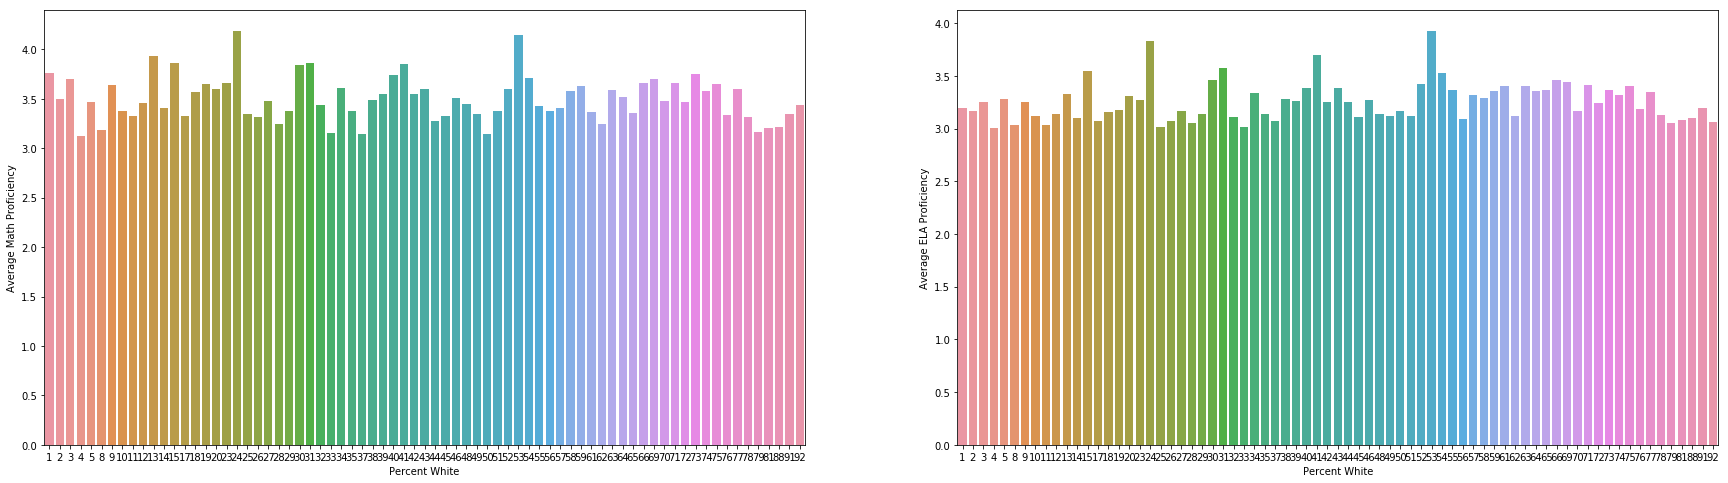

In [270]:
dfWhiteAvgSubProficiency = schoolwithhighestavgproficiency.groupby('Percent White', as_index=False)['Average ELA Proficiency'].mean()
dfWhiteAvgSubProficiency['Average Math Proficiency'] = schoolwithhighestavgproficiency.groupby('Percent White', as_index=False)['Average Math Proficiency'].mean()['Average Math Proficiency']
f, ax = plt.subplots(1, 2, figsize=(30, 8), sharex=True)
sns.barplot(x='Percent White', y='Average Math Proficiency', data=dfWhiteAvgSubProficiency, ax=ax[0])
sns.barplot(x='Percent White', y='Average ELA Proficiency', data=dfWhiteAvgSubProficiency, ax=ax[1]);

#### How does Black American fare in term of grades 

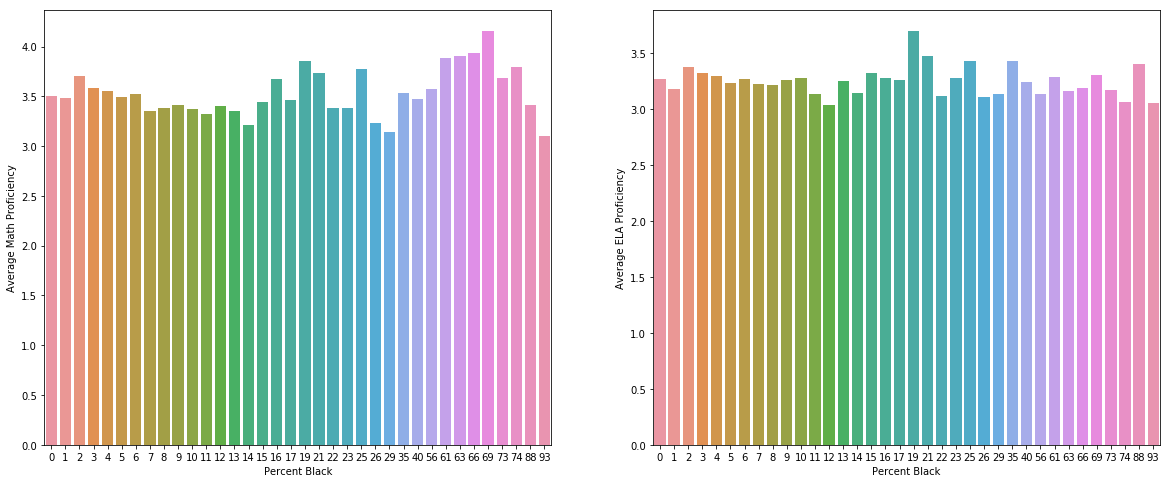

In [267]:
dfBlackAvgSubProficiency = schoolwithhighestavgproficiency.groupby('Percent Black', as_index=False)['Average ELA Proficiency'].mean()
dfBlackAvgSubProficiency['Average Math Proficiency'] = schoolwithhighestavgproficiency.groupby('Percent Black', as_index=False)['Average Math Proficiency'].mean()['Average Math Proficiency']
f, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True)
sns.barplot(x='Percent Black', y='Average Math Proficiency', data=dfBlackAvgSubProficiency, ax=ax[0])
sns.barplot(x='Percent Black', y='Average ELA Proficiency', data=dfBlackAvgSubProficiency, ax=ax[1]);

#### How does Hispanics fare in term of grades

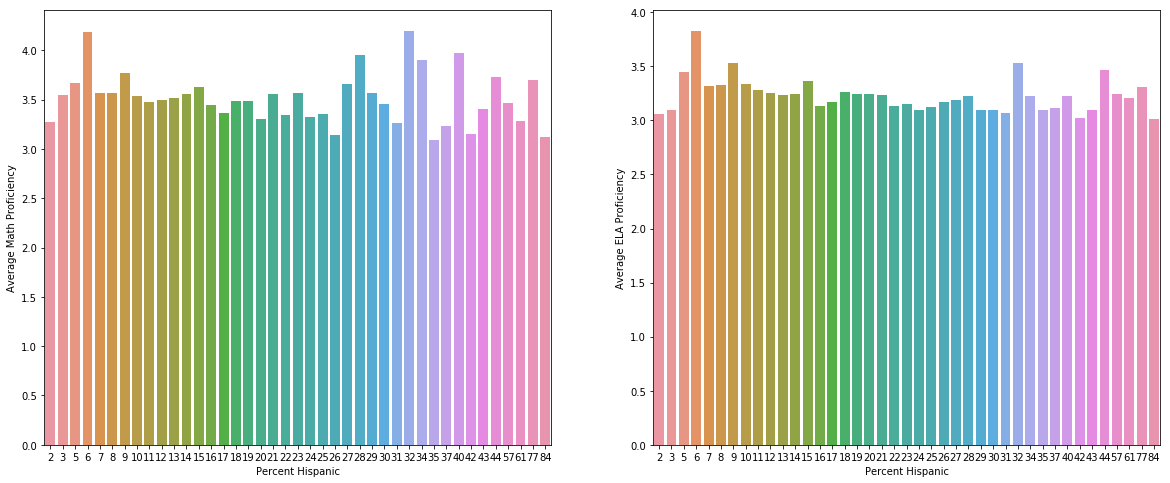

In [268]:
dfHispanicAvgSubProficiency = schoolwithhighestavgproficiency.groupby('Percent Hispanic', as_index=False)['Average ELA Proficiency'].mean()
dfHispanicAvgSubProficiency['Average Math Proficiency'] = schoolwithhighestavgproficiency.groupby('Percent Hispanic', as_index=False)['Average Math Proficiency'].mean()['Average Math Proficiency']
f, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True)
sns.barplot(x='Percent Hispanic', y='Average Math Proficiency', data=dfHispanicAvgSubProficiency, ax=ax[0])
sns.barplot(x='Percent Hispanic', y='Average ELA Proficiency', data=dfHispanicAvgSubProficiency, ax=ax[1]);

#### How does Black/Hispanic fare in terms of proficiency

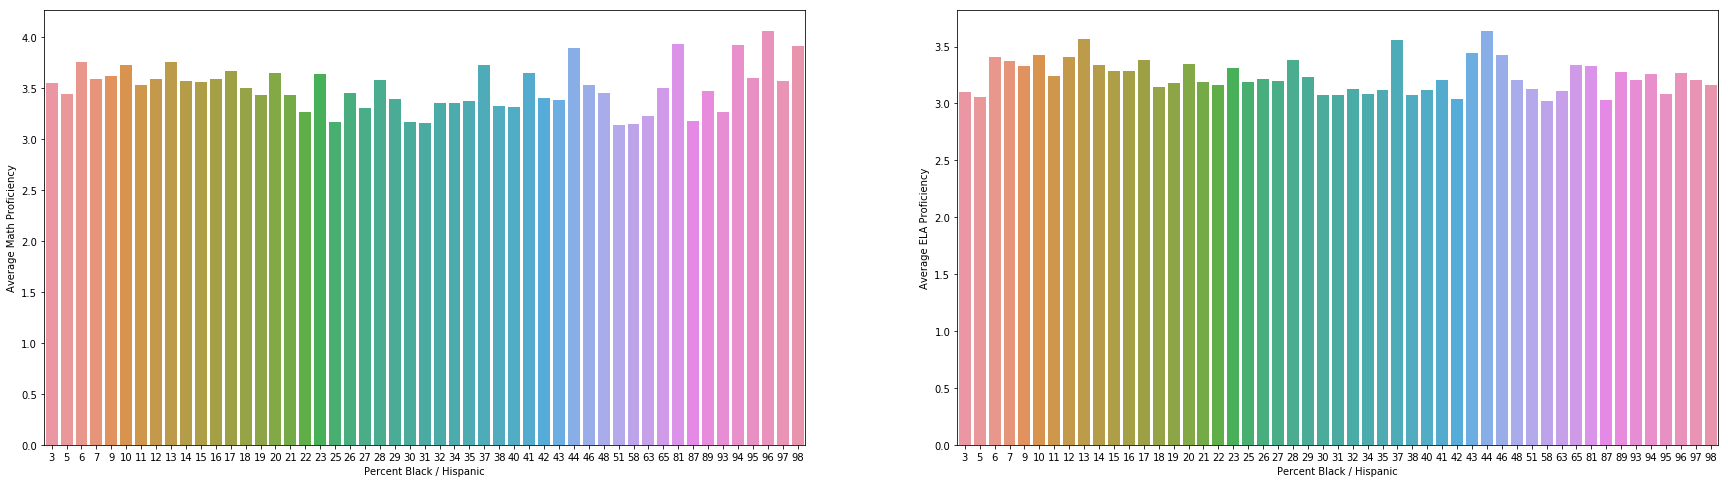

In [272]:
dfBlackHispanicAvgSubProficiency = schoolwithhighestavgproficiency.groupby('Percent Black / Hispanic', as_index=False)['Average ELA Proficiency'].mean()
dfBlackHispanicAvgSubProficiency['Average Math Proficiency'] = schoolwithhighestavgproficiency.groupby('Percent Black / Hispanic', as_index=False)['Average Math Proficiency'].mean()['Average Math Proficiency']
f, ax = plt.subplots(1, 2, figsize=(30, 8), sharex=True)
sns.barplot(x='Percent Black / Hispanic', y='Average Math Proficiency', data=dfBlackHispanicAvgSubProficiency, ax=ax[0])
sns.barplot(x='Percent Black / Hispanic', y='Average ELA Proficiency', data=dfBlackHispanicAvgSubProficiency, ax=ax[1]);

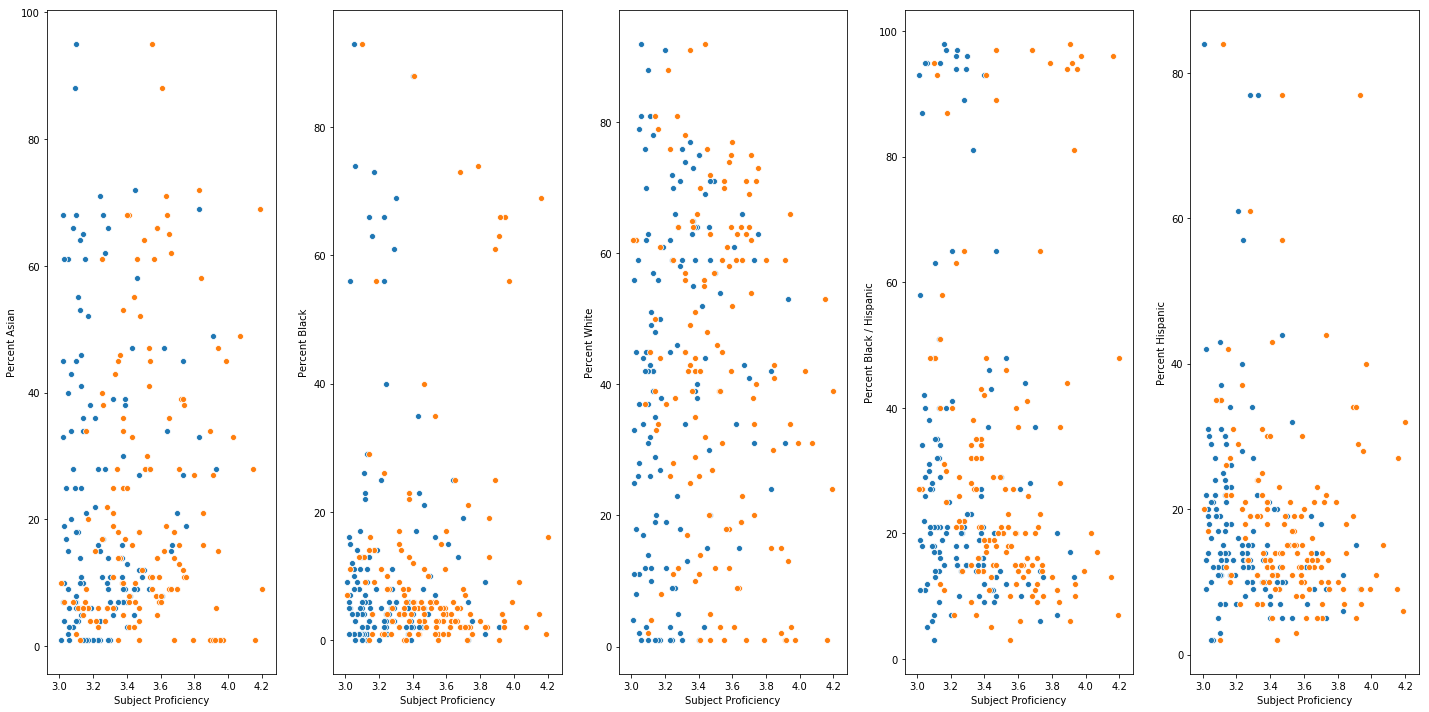

In [77]:
f, ax = plt.subplots(1, 5, figsize=(20, 10), sharex=True)

sns.scatterplot(x=schoolwithhighestavgproficiency['Average ELA Proficiency'], y=schoolwithhighestavgproficiency['Percent Asian'], ax=ax[0])
sns.scatterplot(x=schoolwithhighestavgproficiency['Average Math Proficiency'], y=schoolwithhighestavgproficiency['Percent Asian'], ax=ax[0])
ax[0].set_xlabel('Subject Proficiency')

sns.scatterplot(x=schoolwithhighestavgproficiency['Average ELA Proficiency'], y=schoolwithhighestavgproficiency['Percent Black'], ax=ax[1])
sns.scatterplot(x=schoolwithhighestavgproficiency['Average Math Proficiency'], y=schoolwithhighestavgproficiency['Percent Black'], ax=ax[1])
ax[1].set_xlabel('Subject Proficiency')

sns.scatterplot(x=schoolwithhighestavgproficiency['Average ELA Proficiency'], y=schoolwithhighestavgproficiency['Percent White'], ax=ax[2])
sns.scatterplot(x=schoolwithhighestavgproficiency['Average Math Proficiency'], y=schoolwithhighestavgproficiency['Percent White'], ax=ax[2])
ax[2].set_xlabel('Subject Proficiency')

sns.scatterplot(x=schoolwithhighestavgproficiency['Average ELA Proficiency'], y=schoolwithhighestavgproficiency['Percent Black / Hispanic'], ax=ax[3])
sns.scatterplot(x=schoolwithhighestavgproficiency['Average Math Proficiency'], y=schoolwithhighestavgproficiency['Percent Black / Hispanic'], ax=ax[3])
ax[3].set_xlabel('Subject Proficiency')

sns.scatterplot(x=schoolwithhighestavgproficiency['Average ELA Proficiency'], y=schoolwithhighestavgproficiency['Percent Hispanic'], ax=ax[4])
sns.scatterplot(x=schoolwithhighestavgproficiency['Average Math Proficiency'], y=schoolwithhighestavgproficiency['Percent Hispanic'], ax=ax[4])
ax[4].set_xlabel('Subject Proficiency')

f.tight_layout()


### Check if student of  attendance play a role in ELA and Math Proficiency

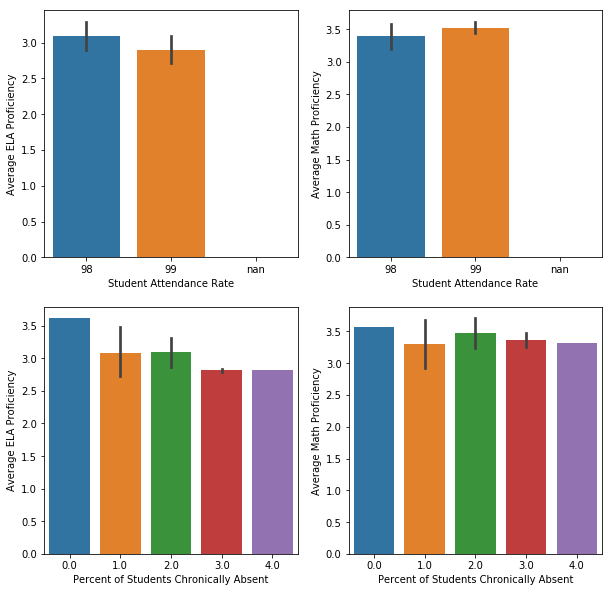

In [73]:
columns = ['School Name', 'District', 'Student Attendance Rate', 'Percent of Students Chronically Absent','Average ELA Proficiency', 
         'Average Math Proficiency']

studentattendance = schoolswhichregistered[columns].copy()
studentattendance['Student Attendance Rate'] = pd.to_numeric(studentattendance['Student Attendance Rate'].astype(str).apply(lambda x: x.replace('%', '')), errors='ignore')
studentattendance['Percent of Students Chronically Absent'] = pd.to_numeric(studentattendance['Percent of Students Chronically Absent'].astype(str).apply(lambda x: float(x.replace('%', ''))), errors='ignore')

studentattendance = studentattendance.sort_values(by=['Student Attendance Rate','Percent of Students Chronically Absent'], ascending=[False, True])
studentattendance = studentattendance[:50] # take top 30
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x=studentattendance['Student Attendance Rate'], y=studentattendance['Average ELA Proficiency'], ax=ax[0, 0])
sns.barplot(x=studentattendance['Student Attendance Rate'], y=studentattendance['Average Math Proficiency'], ax=ax[0, 1])
sns.barplot(x=studentattendance['Percent of Students Chronically Absent'], y=studentattendance['Average ELA Proficiency'], ax=ax[1, 0])
sns.barplot(x=studentattendance['Percent of Students Chronically Absent'], y=studentattendance['Average Math Proficiency'], ax=ax[1, 1])


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramDat

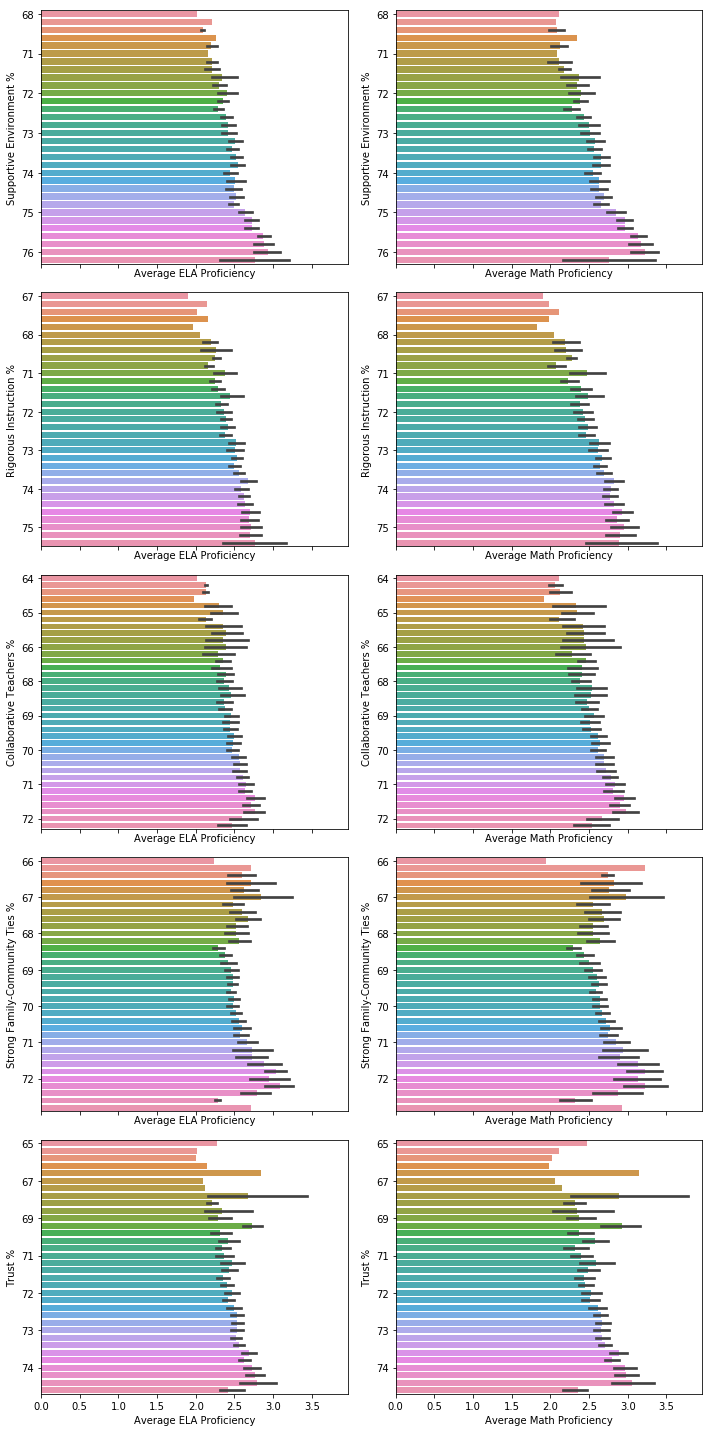

In [95]:
columns=['Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %','Trust Rating','Student Achievement Rating',
 'Average ELA Proficiency','Average Math Proficiency']


supportiveSchoolEnv = schoolswhichregistered[columns]
supportiveSchoolEnv.loc[:, 'Supportive Environment %'] = supportiveSchoolEnv.loc[:, 'Supportive Environment %'].astype(str).apply(lambda x: x.replace('%', '').strip())
supportiveSchoolEnv.loc[:, 'Rigorous Instruction %'] = supportiveSchoolEnv.loc[:, 'Rigorous Instruction %'].astype(str).apply(lambda x: x.replace('%', '').strip())
supportiveSchoolEnv.loc[:, 'Collaborative Teachers %'] = supportiveSchoolEnv.loc[:, 'Collaborative Teachers %'].astype(str).apply(lambda x: x.replace('%', '').strip())
supportiveSchoolEnv.loc[:, 'Effective School Leadership %'] = supportiveSchoolEnv.loc[:, 'Effective School Leadership %'].astype(str).apply(lambda x: x.replace('%', '').strip())
supportiveSchoolEnv.loc[:, 'Strong Family-Community Ties %'] = supportiveSchoolEnv.loc[:, 'Strong Family-Community Ties %'].astype(str).apply(lambda x: x.replace('%', '').strip())
supportiveSchoolEnv.loc[:, 'Trust %'] = supportiveSchoolEnv.loc[:, 'Trust %'].astype(str).apply(lambda x: x.replace('%', '').strip())
supportiveSchoolEnv.dropna(inplace=True)
supportiveSchoolEnv['Supportive Environment %'] = pd.to_numeric(supportiveSchoolEnv['Supportive Environment %'])
supportiveSchoolEnv['Rigorous Instruction %'] = pd.to_numeric(supportiveSchoolEnv['Rigorous Instruction %'])
supportiveSchoolEnv['Collaborative Teachers %'] = pd.to_numeric(supportiveSchoolEnv['Collaborative Teachers %'])
supportiveSchoolEnv['Strong Family-Community Ties %'] = pd.to_numeric(supportiveSchoolEnv['Strong Family-Community Ties %'])
supportiveSchoolEnv['Trust %'] = pd.to_numeric(supportiveSchoolEnv['Trust %'])

#supportiveSchoolEnv.sort_values(by=['Supportive Environment %'], ascending=[True])
supportiveSchoolEnv = supportiveSchoolEnv[(supportiveSchoolEnv['Supportive Environment %'] > 60) 
                                          & (supportiveSchoolEnv['Rigorous Instruction %'] > 60)
                                          & (supportiveSchoolEnv['Collaborative Teachers %'] > 60) 
                                          & (supportiveSchoolEnv['Strong Family-Community Ties %'] > 60)
                                          & (supportiveSchoolEnv['Trust %'] > 60)]
fig, ax = plt.subplots(5, 2, figsize=(10, 20), sharex = True)
ax00 = sns.barplot(x=supportiveSchoolEnv['Average ELA Proficiency'], y=supportiveSchoolEnv['Supportive Environment %'], ax=ax[0, 0], orient='h')
ax00.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax01 = sns.barplot(x=supportiveSchoolEnv['Average Math Proficiency'], y=supportiveSchoolEnv['Supportive Environment %'], ax=ax[0, 1], orient='h')
ax01.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax10 = sns.barplot(x=supportiveSchoolEnv['Average ELA Proficiency'], y=supportiveSchoolEnv['Rigorous Instruction %'], ax=ax[1, 0], orient='h')
ax10.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax11 = sns.barplot(x=supportiveSchoolEnv['Average Math Proficiency'], y=supportiveSchoolEnv['Rigorous Instruction %'], ax=ax[1, 1], orient='h')
ax11.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax20 = sns.barplot(x=supportiveSchoolEnv['Average ELA Proficiency'], y=supportiveSchoolEnv['Collaborative Teachers %'], ax=ax[2, 0], orient='h')
ax20.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax21 = sns.barplot(x=supportiveSchoolEnv['Average Math Proficiency'], y=supportiveSchoolEnv['Collaborative Teachers %'], ax=ax[2, 1], orient='h')
ax21.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax30 = sns.barplot(x=supportiveSchoolEnv['Average ELA Proficiency'], y=supportiveSchoolEnv['Strong Family-Community Ties %'], ax=ax[3, 0], orient='h')
ax30.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax31 = sns.barplot(x=supportiveSchoolEnv['Average Math Proficiency'], y=supportiveSchoolEnv['Strong Family-Community Ties %'], ax=ax[3, 1], orient='h')
ax31.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax40 = sns.barplot(x=supportiveSchoolEnv['Average ELA Proficiency'], y=supportiveSchoolEnv['Trust %'], ax=ax[4, 0], orient='h')
ax40.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax41 = sns.barplot(x=supportiveSchoolEnv['Average Math Proficiency'], y=supportiveSchoolEnv['Trust %'], ax=ax[4, 1], orient='h')
ax41.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()

### School Economic Need Index vs Income Estimate



In [140]:
columns = ['School Name',
'District',
'City',
'Economic Need Index',
 'School Income Estimate',
'Community School?']

schoolIncomeEstimate = schoolswhichregistered[columns].copy()
schoolIncomeEstimate.dropna(inplace=True)
schoolIncomeEstimate['School Income Estimate'] = pd.to_numeric(schoolIncomeEstimate['School Income Estimate'].astype(str).apply(lambda x: x.replace('$', '').replace(',','')), errors='ignore')

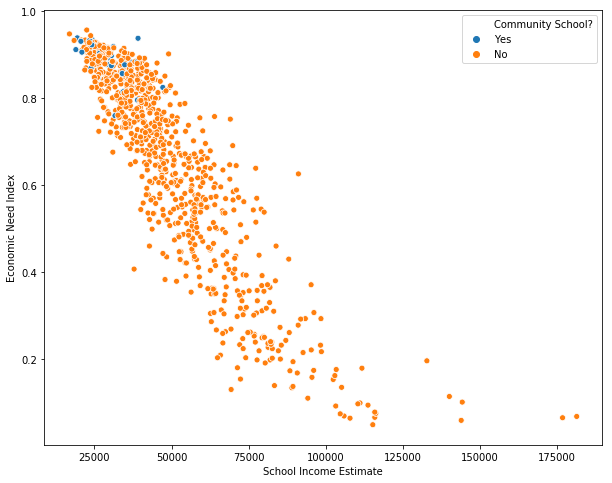

In [149]:
columns = ['School Name',
'District',
'City',
'Economic Need Index',
 'School Income Estimate',
'Community School?']
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(y=schoolIncomeEstimate['Economic Need Index'], x=schoolIncomeEstimate['School Income Estimate'], hue=schoolIncomeEstimate['Community School?'], ax = ax);

### Which type of school performs in Eng and Maths


In [158]:
columns = ['Community School?','Average ELA Proficiency','Average Math Proficiency']
schoolPerformance = schoolswhichregistered[columns].copy()
schoolPerformance.dropna(inplace=True)

(1220, 3)


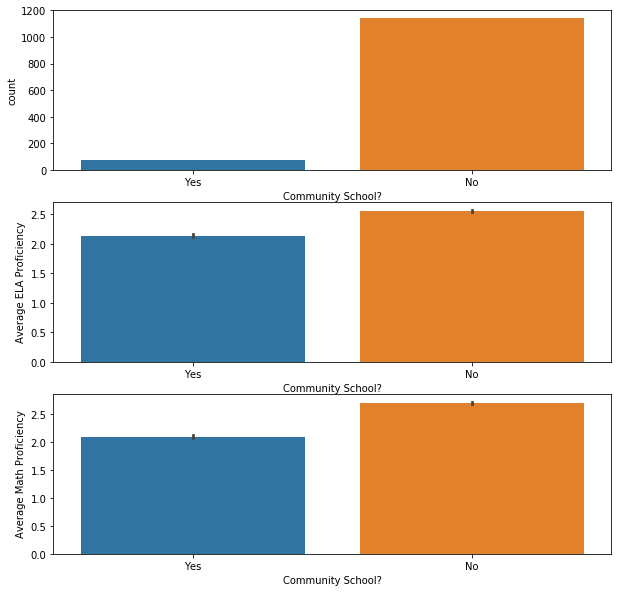

In [277]:
columns = ['Community School?','Average ELA Proficiency','Average Math Proficiency']
f, ax = plt.subplots(3, 1, figsize=(10, 10))
sns.countplot(x=schoolPerformance['Community School?'], ax=ax[0])
sns.barplot(x=schoolPerformance['Community School?'],y=schoolPerformance['Average ELA Proficiency'], ax=ax[1])
sns.barplot(x=schoolPerformance['Community School?'],y=schoolPerformance['Average Math Proficiency'], ax=ax[2])

In [208]:
columns= ['Grade 8 ELA - All Students Tested',
 'Grade 8 ELA 4s - All Students',
 'Grade 8 ELA 4s - American Indian or Alaska Native',
 'Grade 8 ELA 4s - Black or African American',
 'Grade 8 ELA 4s - Hispanic or Latino',
 'Grade 8 ELA 4s - Asian or Pacific Islander',
 'Grade 8 ELA 4s - White',
 'Grade 8 ELA 4s - Multiracial',
 'Grade 8 ELA 4s - Limited English Proficient',
 'Grade 8 ELA 4s - Economically Disadvantaged',
 'Grade 8 Math - All Students Tested',
 'Grade 8 Math 4s - All Students',
 'Grade 8 Math 4s - American Indian or Alaska Native',
 'Grade 8 Math 4s - Black or African American',
 'Grade 8 Math 4s - Hispanic or Latino',
 'Grade 8 Math 4s - Asian or Pacific Islander',
 'Grade 8 Math 4s - White',
 'Grade 8 Math 4s - Multiracial',
 'Grade 8 Math 4s - Limited English Proficient',
 'Grade 8 Math 4s - Economically Disadvantaged',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic', 
 'Percent Black / Hispanic',
 'Percent White']

schoolsethnichpasspercentage = schoolswhichregistered[columns].copy()#[['Grade 8 ELA 4s - All Students','Grade 8 ELA - All Students Tested' , 'Grade 8 ELA 4s - Asian or Pacific Islander','Percent Asian']]

In [209]:
schoolsethnichpasspercentage['Percent Asian'] = pd.to_numeric(schoolsethnichpasspercentage['Percent Asian'].apply(lambda x: x.replace('%', '')))/100
schoolsethnichpasspercentage['Percent Black'] = pd.to_numeric(schoolsethnichpasspercentage['Percent Black'].apply(lambda x: x.replace('%', '')))/100
schoolsethnichpasspercentage['Percent Hispanic'] = pd.to_numeric(schoolsethnichpasspercentage['Percent Hispanic'].apply(lambda x: x.replace('%', '')))/100
schoolsethnichpasspercentage['Percent Black / Hispanic'] = pd.to_numeric(schoolsethnichpasspercentage['Percent Black / Hispanic'].apply(lambda x: x.replace('%', '')))/100
schoolsethnichpasspercentage['Percent White'] = pd.to_numeric(schoolsethnichpasspercentage['Percent White'].apply(lambda x: x.replace('%', '')))/100

In [210]:
schoolsethnichpasspercentage['Grade 8 ELA 4s - Asian or Pacific Islander'] = schoolsethnichpasspercentage['Grade 8 ELA 4s - Asian or Pacific Islander'] /(schoolsethnichpasspercentage['Percent Asian']*schoolsethnichpasspercentage['Grade 8 ELA - All Students Tested'])
schoolsethnichpasspercentage['Grade 8 Math 4s - Asian or Pacific Islander'] = schoolsethnichpasspercentage['Grade 8 Math 4s - Asian or Pacific Islander'] /(schoolsethnichpasspercentage['Percent Asian']*schoolsethnichpasspercentage['Grade 8 Math - All Students Tested'])
schoolsethnichpasspercentage['Grade 8 ELA 4s - Hispanic or Latino'] = schoolsethnichpasspercentage['Grade 8 ELA 4s - Hispanic or Latino'] /(schoolsethnichpasspercentage['Percent Hispanic']*schoolsethnichpasspercentage['Grade 8 ELA - All Students Tested'])
schoolsethnichpasspercentage['Grade 8 Math 4s - Hispanic or Latino'] = schoolsethnichpasspercentage['Grade 8 Math 4s - Hispanic or Latino'] /(schoolsethnichpasspercentage['Percent Hispanic']*schoolsethnichpasspercentage['Grade 8 Math - All Students Tested'])
schoolsethnichpasspercentage['Grade 8 ELA 4s - White'] = schoolsethnichpasspercentage['Grade 8 ELA 4s - White'] /(schoolsethnichpasspercentage['Percent White']*schoolsethnichpasspercentage['Grade 8 ELA - All Students Tested'])
schoolsethnichpasspercentage['Grade 8 Math 4s - White'] = schoolsethnichpasspercentage['Grade 8 Math 4s - White'] /(schoolsethnichpasspercentage['Percent White']*schoolsethnichpasspercentage['Grade 8 Math - All Students Tested'])
schoolsethnichpasspercentage['Grade 8 ELA 4s - Black or African American'] = schoolsethnichpasspercentage['Grade 8 ELA 4s - Black or African American'] /(schoolsethnichpasspercentage['Percent Black']*schoolsethnichpasspercentage['Grade 8 ELA - All Students Tested'])
schoolsethnichpasspercentage['Grade 8 Math 4s - Black or African American'] = schoolsethnichpasspercentage['Grade 8 Math 4s - Black or African American'] /(schoolsethnichpasspercentage['Percent Black']*schoolsethnichpasspercentage['Grade 8 Math - All Students Tested'])

In [211]:
schoolsethnichpasspercentage = schoolsethnichpasspercentage.fillna(0)

In [212]:
schoolsethnichpasspercentage.head()

,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,...,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Average ELA Proficiency,Average Math Proficiency,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,2.14,2.17,0.05,0.32,0.60,0.92,0.01
1,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,2.63,2.98,0.10,0.20,0.63,0.83,0.06
2,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,2.39,2.54,0.35,0.08,0.49,0.57,0.04
3,47,1,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,2.48,2.47,0.05,0.29,0.63,0.92,0.04
4,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,2.38,2.54,0.04,0.20,0.65,0.84,0.10


In [191]:
english = {'Race':['Black', 'White', 'Hispanic', 'Asian'], 'G8-Eng':[schoolsethnichpasspercentage['Grade 8 ELA 4s - Black or African American'],
                                                                     schoolsethnichpasspercentage['Grade 8 ELA 4s - White'],
                                                                     schoolsethnichpasspercentage['Grade 8 ELA 4s - Hispanic or Latino'],
                                                                     schoolsethnichpasspercentage['Grade 8 ELA 4s - Asian or Pacific Islander']]
          }

In [213]:
columns = ['Black', 'White', 'Hispanic', 'Asian']


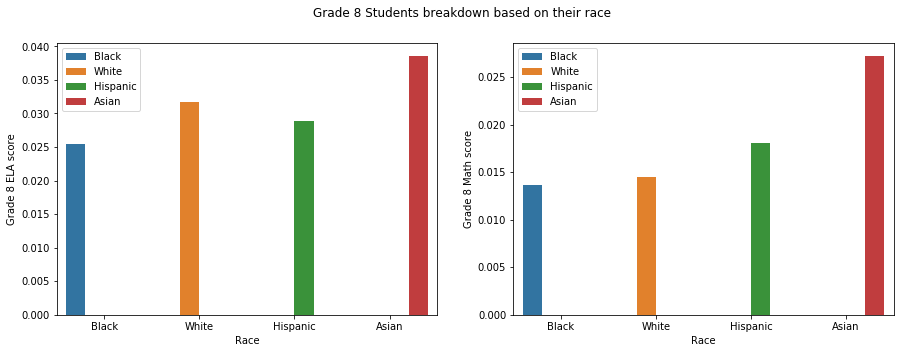

In [226]:
f, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)

elaax = sns.barplot(x=columns, y=[schoolsethnichpasspercentage['Grade 8 ELA 4s - Black or African American'].mean(), 
                         schoolsethnichpasspercentage['Grade 8 ELA 4s - White'].mean(),
                         schoolsethnichpasspercentage['Grade 8 ELA 4s - Hispanic or Latino'].mean(),
                         schoolsethnichpasspercentage['Grade 8 ELA 4s - Asian or Pacific Islander'].mean()], hue=columns, ax = ax[0]);

mathax = sns.barplot(x=columns, y=[schoolsethnichpasspercentage['Grade 8 Math 4s - Black or African American'].mean(), 
                         schoolsethnichpasspercentage['Grade 8 Math 4s - White'].mean(),
                         schoolsethnichpasspercentage['Grade 8 Math 4s - Hispanic or Latino'].mean(),
                         schoolsethnichpasspercentage['Grade 8 Math 4s - Asian or Pacific Islander'].mean()], hue=columns, ax = ax[1]);
f.suptitle('Grade 8 Students breakdown based on their race');
elaax.set_xlabel("Race");
elaax.set_ylabel('Grade 8 ELA score');
mathax.set_xlabel("Race");
mathax.set_ylabel('Grade 8 Math score');